# 
- 타이타닉 데이터로 시각화 하기
- survived 이 변수에 따라서 달라지는 변수를 시각화해보기
- 반복문을 이용해서 시각화

In [40]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [41]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
import pandas as pd

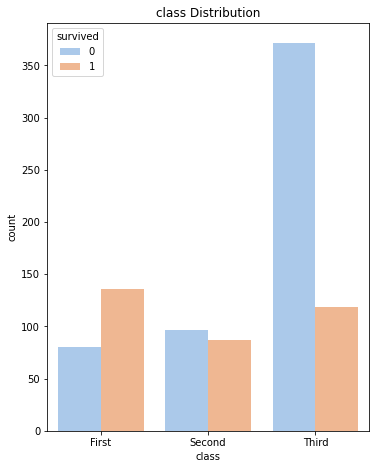

In [43]:
grid = gridspec.GridSpec(2,2) 
plt.figure(figsize=(15,18)) 
plt.subplots_adjust(wspace=0.6, hspace=0.4) 

titanic_features = ['class']

for idx, feature in enumerate(titanic_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=titanic,
                 hue='survived',
                 palette='pastel',
                 ax=ax)
    ax.set_title(f'{feature} Distribution')

#### class에 따른 생존율 
- survived 1:생존, 0:사망
- Third 칸보다 First 칸의 생존율이 훨씬 높다.

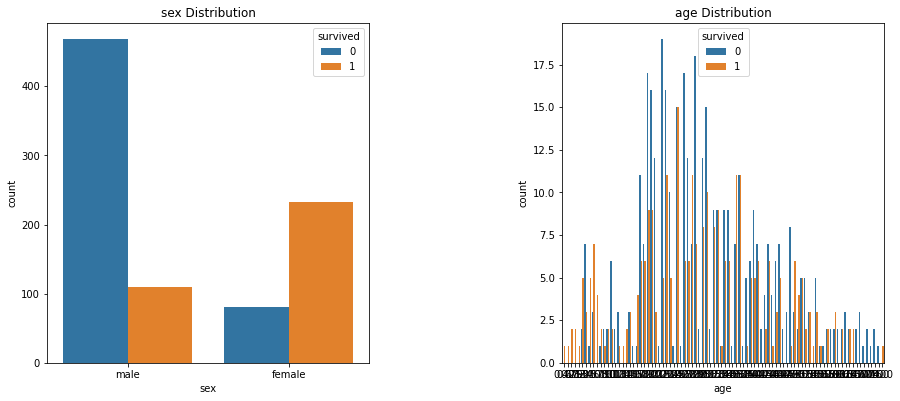

In [44]:
grid = gridspec.GridSpec(2,2) 
plt.figure(figsize=(15,15)) 
plt.subplots_adjust(wspace=0.6, hspace=0.4) 

titanic_features = ['sex','age']

for idx, feature in enumerate(titanic_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=titanic,
                 hue='survived',
                 ax=ax)
    ax.set_title(f'{feature} Distribution')

#### sex, age 별에 따른 생존율
- 여성이 남성에 비해 생존율이 더 높다.

- age의 범주가 너무 많다 --> 나이를 연령대별로 나눠서 표현

In [45]:
## age에 결측치가 존재! age 결측값 확인
titanic['age'].isna().sum()

177

In [46]:
## age의 결측값을 age의 중간값으로 바꾼다.
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [47]:
titanic['age'].isna().sum()

0

In [48]:
def group(age):
    age = (age//10)*10
    return age

In [50]:
Age_group = titanic.age.apply(group)
age_group = Age_group.astype('category')

In [51]:
titanic['age_group'] = age_group

In [52]:
titanic[['age','age_group']]

,age,age_group
0,22.0,20.0
1,38.0,30.0
2,26.0,20.0
3,35.0,30.0
4,35.0,30.0
...,...,...
886,27.0,20.0
887,19.0,10.0
888,28.0,20.0
889,26.0,20.0


### 
- 나이를 연령대별로 나눠 age_group 이라는 변수에 넣은 다음 titanic 열에 추가!! 

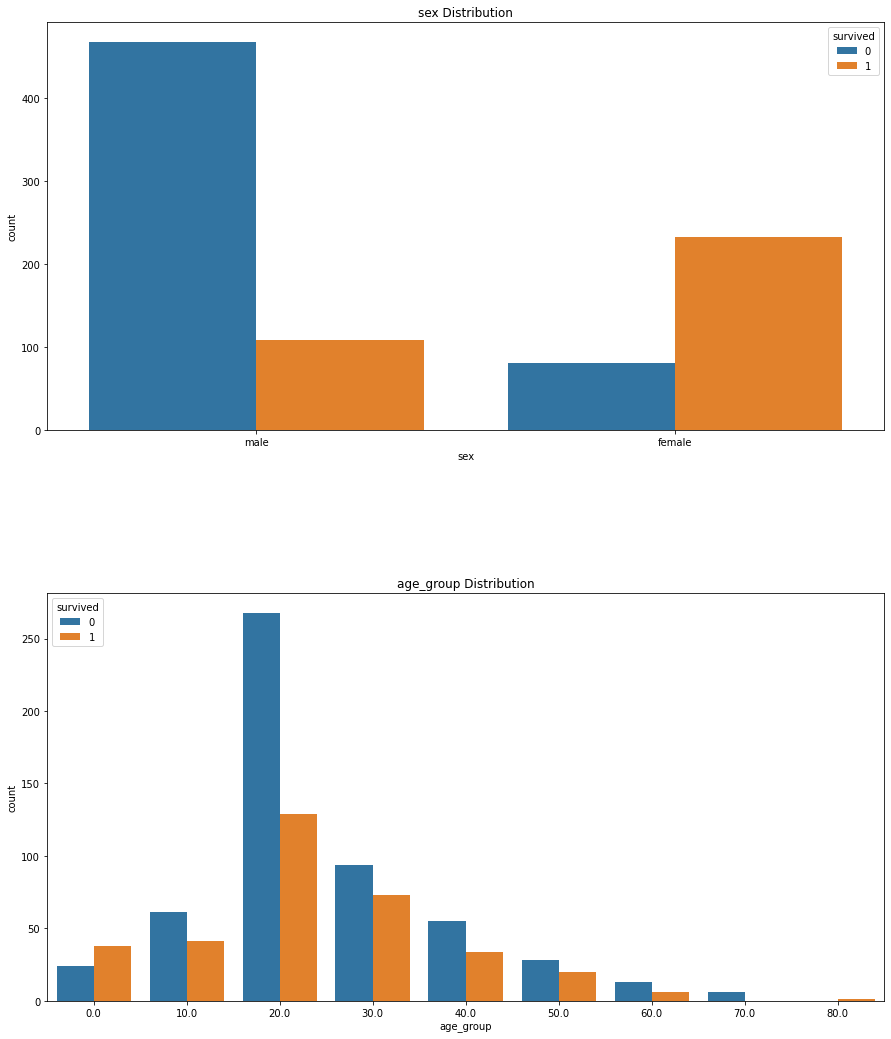

In [53]:
grid = gridspec.GridSpec(2,1) 
plt.figure(figsize=(15,18)) 
plt.subplots_adjust(wspace=0.6, hspace=0.4) 

titanic_features = ['sex','age_group']

for idx, feature in enumerate(titanic_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=titanic,
                 hue='survived',
                 ax=ax)
    ax.set_title(f'{feature} Distribution')

<AxesSubplot:xlabel='class', ylabel='alive'>

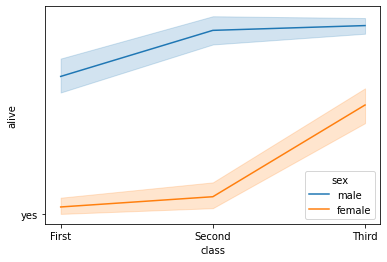

In [54]:
sns.lineplot(x='class',y='alive',hue='sex', data=titanic)

#### 성별에 따른 class별 생존율을 lineplot으로 표현 
- 여성보다 남성의 생존율이 훨씬 낮은 것을 알 수 있다.
- First 칸의 여성 생존율이 제일 높고 Third 칸의 남성 생존율이 제일 낮다. 

In [55]:
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
import pandas as pd
grid = gridspec.GridSpec(2,2) 

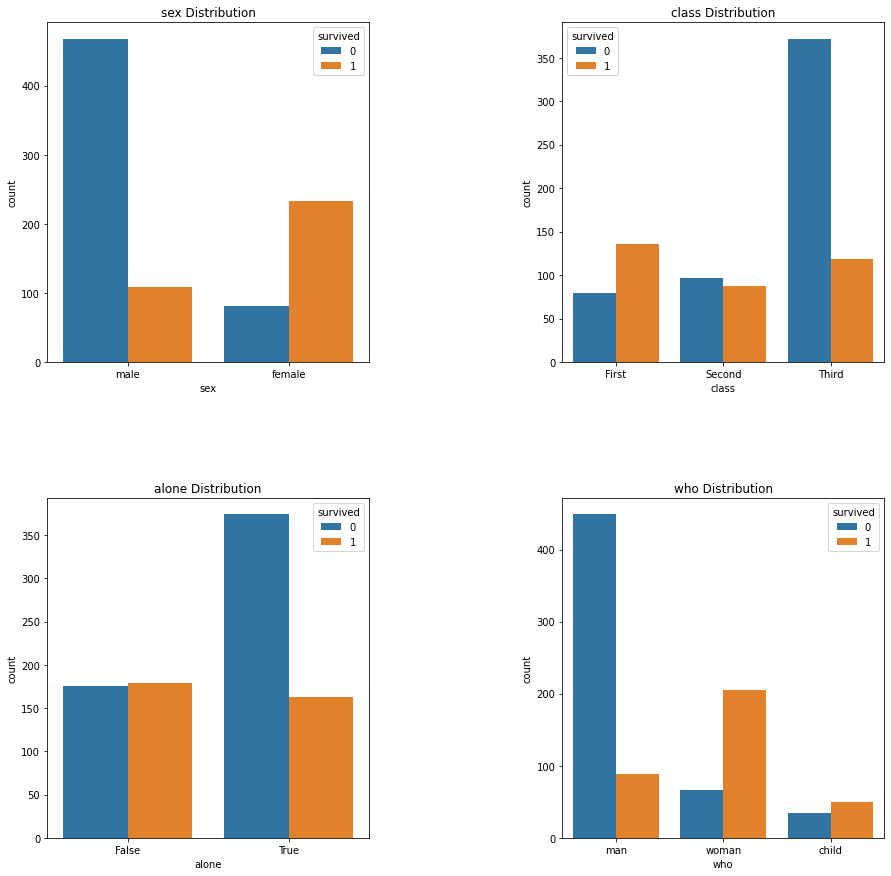

In [56]:
plt.figure(figsize=(15,15)) 
plt.subplots_adjust(wspace=0.6, hspace=0.4) 

titanic_features = ['sex','class','alone','who']

for idx, feature in enumerate(titanic_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=titanic,
                 hue='survived',
                 ax=ax)
    ax.set_title(f'{feature} Distribution')

<AxesSubplot:xlabel='class', ylabel='survived'>

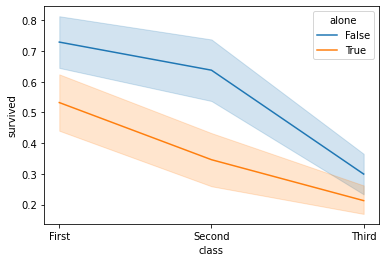

In [57]:
sns.lineplot(x='class',y='survived',hue='alone', data=titanic)

#### 혼자 온 사람의 생존율이 더 낮다. 

<AxesSubplot:xlabel='alive', ylabel='alone'>

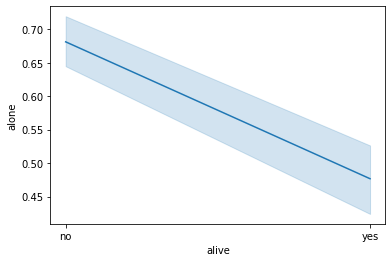

In [20]:
sns.lineplot(x='alive',y='alone', data=titanic)

<AxesSubplot:xlabel='class', ylabel='alone'>

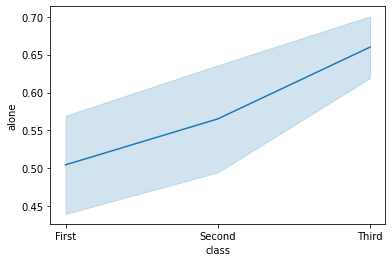

In [70]:
sns.lineplot(x='class',y='alone', data=titanic)